In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sampledataset.csv")
df.head()

,Years of Experience,Salary (in $1000)
0,6,62
1,3,56
2,12,74
3,14,78
4,10,70


In [3]:
df.dtypes

Years of Experience    int64
Salary (in $1000)      int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Years of Experience  15 non-null     int64
 1   Salary (in $1000)    15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [5]:
df.isnull().sum()

Years of Experience    0
Salary (in $1000)      0
dtype: int64

In [6]:
df.describe()

,Years of Experience,Salary (in $1000)
count,15.000000,15.000000
mean,7.866667,65.733333
std,3.502380,7.004760
min,2.000000,54.000000
25%,6.000000,62.000000
50%,7.000000,64.000000
75%,10.000000,70.000000
max,14.000000,78.000000


In [7]:
df.columns

Index(['Years of Experience', 'Salary (in $1000)'], dtype='object')

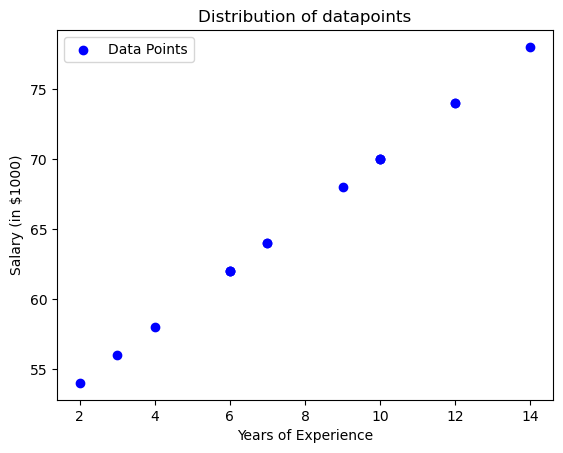

In [8]:
#scatter plot
x = df['Years of Experience'].values
y = df['Salary (in $1000)'].values

plt.scatter(x, y, color='blue', label='Data Points')
plt.title("Distribution of datapoints")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in $1000)")
plt.legend()
plt.show()

In [9]:
df.corr()

,Years of Experience,Salary (in $1000)
Years of Experience,1.0,1.0
Salary (in $1000),1.0,1.0


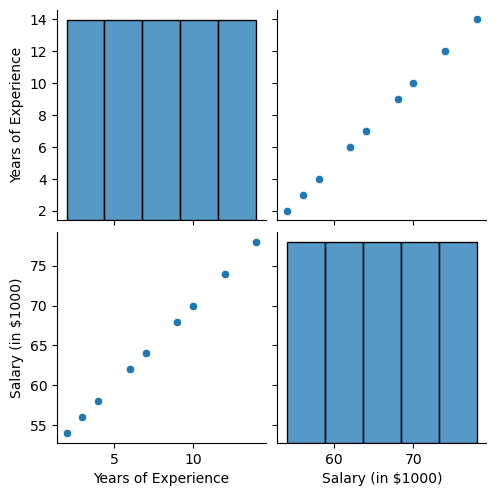

In [14]:
#Pair plots for data visualization
sns.pairplot(df)
plt.show()

In [16]:
#Independent features
x= df[['Years of Experience']] #conversion into DataFrame
type(x)

pandas.core.frame.DataFrame

In [17]:
np.array(x.shape)

array([15,  1])

In [26]:
##Dependent variable
df.shape

(15, 2)

In [27]:
##Train, Test, Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape

(11, 1)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)

array([[-0.23918244],
       [-0.50228312],
       [ 1.07632096],
       [-1.29158516],
       [-0.23918244],
       [ 0.5501196 ],
       [-1.02848448],
       [-1.55468584],
       [ 0.5501196 ],
       [ 1.60252233],
       [ 1.07632096]])

In [29]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.28701892],
       [-0.50228312],
       [-0.50228312],
       [ 0.5501196 ]])

In [30]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [31]:
print("Slope",regression.coef_)
print("Intercept",regression.intercept_)

Slope [2.]
Intercept 50.0


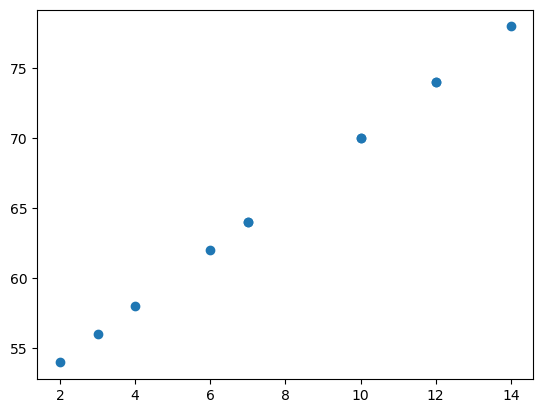

In [32]:
## plot Training data plot best fit line
scatter = plt.scatter(x_train,y_train)
plt.show(scatter)

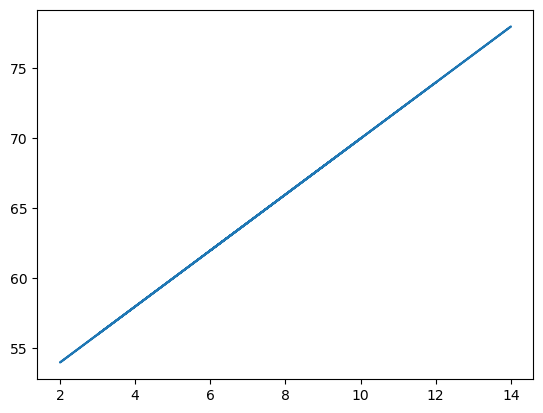

In [33]:
slope_of_best_fit = plt.plot(x_train,regression.predict(x_train))
plt.show(slope_of_best_fit)